# Closest Pair Algorith

In [74]:
import random
import matplotlib.pyplot as plt
import matplotlib.transforms
import time

def plot_points(points, middle_line=None):
    fig, ax  = plt.subplots()
    fig.set_size_inches(16,16)
    ax.spines[["right", "top"]].set_visible(False)
    ax.spines[["left", "bottom"]].set_position('zero')
    ax.plot(points)
    fig.show()


In [75]:
def dist(pair):
    p1, p2 = pair
    return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)**0.5


def closest_split_pair(qx, rx, qy, ry, delta):
    sy = []
    middlex = qx[-1][0]
    for point in (qy + ry):
        if abs(point[0] - middlex) <= delta:
            sy.append(point)
    best = delta
    best_pair = ((1000,1000), (-1000, -1000))
    for i in range(len(sy) - 1):
        for j in range(1, min(7, len(sy) - i)):
            if dist((sy[i], sy[i+j])) < best:
                best = dist((sy[i], sy[i+j]))
                best_pair = (sy[i], sy[i+j])
    return best_pair
        

def closest_pair_three(l):
    pairs = [(l[0], l[1]), (l[1], l[2]), (l[0], l[2])]
    dists = list(map(dist, pairs))
    ind = dists.index(min(dists))
    return pairs[ind]

def closest_pair_core(px, py):
    if len(px) == 2:
        return (px[0], px[1])
    elif len(px) == 3:
        return closest_pair_three(px)
    else:
        middlex = len(px) // 2
        x_in_middlex = px[middlex][0]
        qx = px[:middlex]
        rx = px[middlex:]
        qy = []
        ry = []
        for point in py:
            if point[0] < x_in_middlex:
                qy.append(point)
            else:
                ry.append(point)
        left_pair = closest_pair_core(qx, qy)
        right_pair = closest_pair_core(rx, ry)
        delta = min(dist(left_pair), dist(right_pair))
        split_pair = closest_split_pair(qx, rx, qy, ry, delta)
        
        pairs = [left_pair, right_pair, split_pair]
        dists = list(map(dist, pairs))
        ind = dists.index(min(dists))
        return pairs[ind]

def closest_pair(points):
    px = sorted(points, key=lambda p: p[0])
    py = sorted(points, key=lambda p: p[1])
    return closest_pair_core(px, py)


In [76]:
def collect_data():
    random.seed(3)
    times = []
    min_x, max_x = -100, 100
    min_y, max_y = -100, 100
    for points_count in range(10,500):
        xs = [random.randrange(min_x,max_x,1) for i in range(points_count)]
        ys = [random.randrange(min_y,max_y,1) for i in range(points_count)]
        points = list(zip(xs, ys))
        start_time = time.time()
        closest_pair(points)
        times.append(time.time() - start_time)
    return times

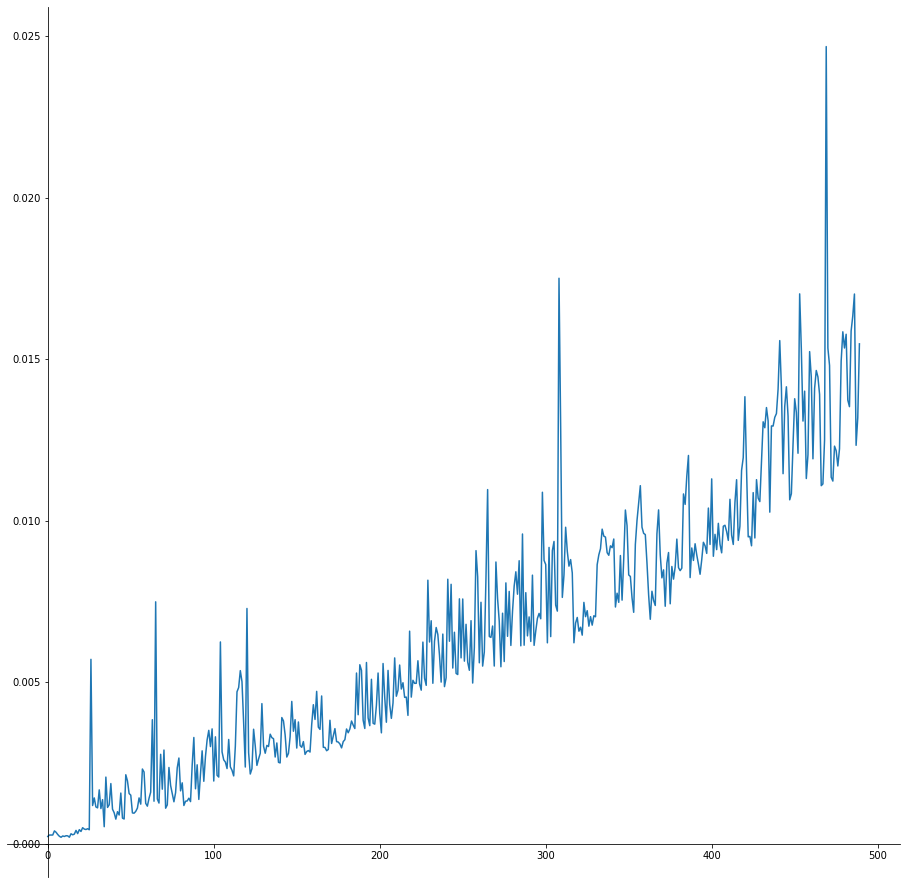

In [77]:
res = collect_data()
plot_points(res)